In [1]:
import pandas as pd
import numpy as np
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
import random
from sklearn import preprocessing
from typing import *
import matplotlib.pyplot as plt


from sklearn.svm import SVC, LinearSVC, LinearSVR
from sklearn.datasets import make_classification
from sklearn.model_selection import train_test_split
from sklearn.pipeline import Pipeline
import shap
import matplotlib.pyplot as plt
import seaborn as sns
import lightgbm as lgb
import shap
from sklearn.model_selection import cross_val_score, RepeatedKFold
from sklearn.pipeline import Pipeline
from sklearn.base import BaseEstimator, TransformerMixin
from sklearn.preprocessing import StandardScaler

Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.
Intel MKL WARNING: Support of Intel(R) Streaming SIMD Extensions 4.2 (Intel(R) SSE4.2) enabled only processors has been deprecated. Intel oneAPI Math Kernel Library 2025.0 will require Intel(R) Advanced Vector Extensions (Intel(R) AVX) instructions.


/Users/willcichowski/opt/anaconda3/envs/dshw4_real/lib/python3.10/site-packages/shap/utils/_clustering.py:35: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-jit for details.
  def _pt_shuffle_rec(i, indexes, index_mask, partition_tree, M, pos):
/Users/willcichowski/opt/anaconda3/envs/dshw4_real/lib/python3.10/site-packages/shap/utils/_clustering.py:54: NumbaDeprecationWarning: The 'nopython' keyword argument was not supplied to the 'numba.jit' decorator. The implicit default value for this argument is currently False, but it will be changed to True in Numba 0.59.0. See https://numba.readthedocs.io/en/stable/reference/deprecation.html#deprecation-of-object-mode-fall-back-behaviour-when-using-ji

In [2]:
import tensorflow as tf
tf.config.run_functions_eagerly(True)
from keras.utils import to_categorical, set_random_seed
from keras.models import Sequential
from keras.utils import to_categorical, set_random_seed
from keras.callbacks import EarlyStopping
from tensorflow.keras.layers import Embedding, LSTM, Dense, InputLayer, Dropout
from tensorflow.keras.optimizers import SGD
#import keras

2023-05-31 21:36:29.662428: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.


In [10]:
check_df = pd.read_csv("train.csv")
check_df

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,NaN,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,0.0000,158603315,0.05,0.0,0,0.0,2.7480,93.45,0.22,4
5376,5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,0.0003,36089167,0.01,6.0,4,4.0,23.6890,76.05,-0.90,8
5377,5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,0.0057,1786891,0.53,44.0,0,28.0,4.3710,80.30,-0.70,21
5378,5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,0.0001,194000000000,0.29,3.0,2,2.0,24.6594,7.95,0.47,13


In [25]:
full_train_df = pd.read_csv("imputed_train.csv")
full_test_df = pd.read_csv("test_imputed.csv")
full_train_df

,id,x001,x002,x003,x004,x005,x006,x007,x008,x009,...,x757,x758,x759,x760,x761,x762,x763,x764,x765,y
0,0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,...,0.0007,297281012,0.13,5.0,5,2.0,8.5127,14.28,-0.75,5
1,1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,...,0.1136,3320000000000,0.08,661.0,0,350.0,1.5700,160.12,1.00,1
2,2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,...,0.0029,100474819,0.39,39.0,2,18.0,9.6800,25.06,-0.49,11
3,3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,...,0.0000,348000000000,0.25,2.0,1,0.0,4.5316,117.76,1.64,1
4,4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,...,0.0005,109546590,0.11,11.0,1,3.0,16.2717,5.81,-0.42,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,...,0.0000,158603315,0.05,0.0,0,0.0,2.7480,93.45,0.22,4
5376,5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,...,0.0003,36089167,0.01,6.0,4,4.0,23.6890,76.05,-0.90,8
5377,5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,...,0.0057,1786891,0.53,44.0,0,28.0,4.3710,80.30,-0.70,21
5378,5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,...,0.0001,194000000000,0.29,3.0,2,2.0,24.6594,7.95,0.47,13


In [5]:
def drop_perfect_corr(df):
    corr_matrix = df.corr().abs()
    upper_tri = corr_matrix.where(np.triu(np.ones(corr_matrix.shape), k=1).astype(bool))
    to_drop = [col for col in upper_tri.columns if any(upper_tri[col] > .99)]
    if to_drop:
        print(f"Dropping variables {', '.join(to_drop)} due to perfect correlation.")
        df.drop(to_drop, axis=1, inplace=True)
    return df

# imputing all of this missing values:
def impute_missing_values(df):
    for col in df.columns:
        if df[col].dtype == 'object':
            df[col].fillna(df[col].mode()[0], inplace=True)
        else:
            df[col].fillna(df[col].median(), inplace=True)


impute_missing_values(full_train_df)
full_train_df = drop_perfect_corr(full_train_df)

The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.


In [7]:
# Assume X and y are your data and target variables, respectively
X = full_train_df.drop(['id', 'y'], 1)
y = full_train_df['y']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)


In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [8]:
class ColumnSelector(BaseEstimator, TransformerMixin):
    def __init__(self, columns):
        self.columns = columns
    def transform(self, X):
        return X[self.columns]
    def fit(self, X, y=None):
        return self

# define the pipeline
pipe = Pipeline([
    ('select', ColumnSelector(columns= X_train.columns)),
    ('scaler', StandardScaler()),
    ('model', lgb.LGBMRegressor(boosting_type='dart', num_leaves=16, max_depth=4, learning_rate=0.05, 
                                objective='regression', n_estimators=1000, reg_alpha=.2, reg_lambda=.2, 
                                subsample=.2, random_state=42))
])
cv = RepeatedKFold(n_splits=5, n_repeats=3, random_state=1)
# get the feature importances using cross-validation
cv_scores = cross_val_score(pipe, X_train, y_train, cv=cv, scoring='neg_mean_squared_error', verbose = 2)
pipe.fit(X_train, y_train)
feature_importances = pipe.named_steps['model'].feature_importances_

# get the SHAP values
explainer = shap.Explainer(pipe.named_steps['model'], predict_disable_shape_check=True)
shap_values = explainer(X_train)

# print the results
print('Cross-validation scores:', np.sqrt(-1 * cv_scores), "\n Mean CV SCORE:", np.mean(np.sqrt(-1 * cv_scores)))
print('\n Feature importances:', feature_importances)
print('\n SHAP values:', shap_values)

[Parallel(n_jobs=1)]: Using backend SequentialBackend with 1 concurrent workers.


: 

: 

In [230]:
test = full_test_df[list(X_train.columns) + ['id']]
preds = pipe.predict(test)
ids = test['id']
submission = pd.DataFrame({'id': ids, 'y': preds})
submission.to_csv("tuned_GBT.csv", index=False)

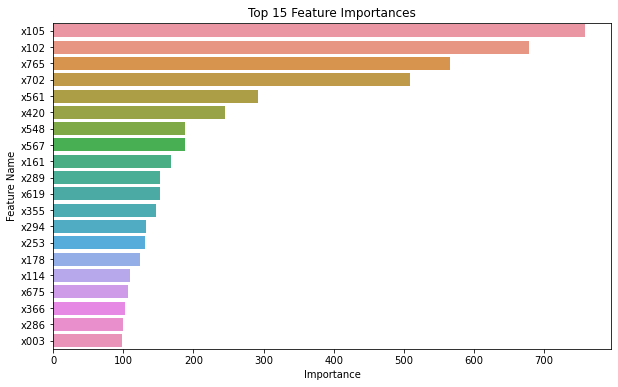

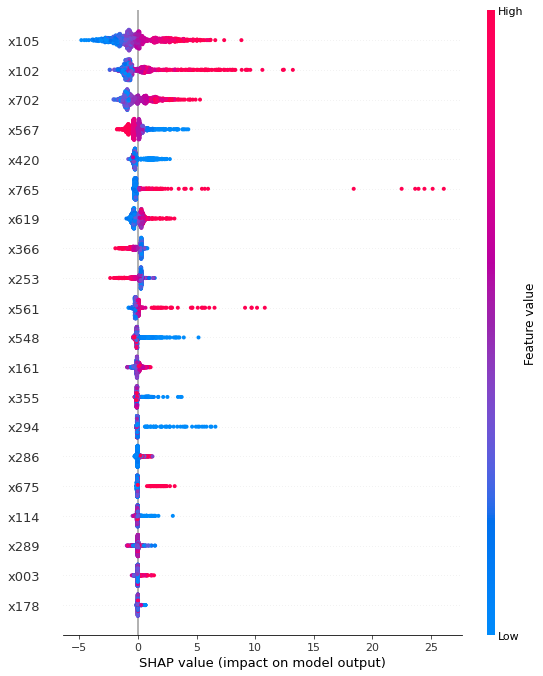

In [6]:
# assuming you already have a fitted LGBMRegressor in a pipeline called `pipe`
# you can retrieve the fitted LGBM model from the pipeline like this:
model = pipe.named_steps['model']

# get the feature importances
importances = model.feature_importances_

# get the shap values for all samples
explainer = shap.Explainer(pipe.named_steps['model'])
shap_values = explainer(pipe.named_steps['scaler'].transform(X_test))

# find the indices of the top 15 features
top15 = importances.argsort()[::-1][:20]

# plot the feature importances
plt.figure(figsize=(10, 6))
sns.barplot(x=importances[top15], y=X_test.columns[top15])
plt.title('Top 15 Feature Importances')
plt.xlabel('Importance')
plt.ylabel('Feature Name')
plt.show()

# plot the shap values for the top 15 features
plt.figure(figsize=(12, 8))
shap.summary_plot(shap_values[:, top15], X_test.iloc[:, top15])
plt.show()


In [208]:
X_test.columns

Index(['x001', 'x002', 'x003', 'x004', 'x005', 'x006', 'x007', 'x008', 'x009',
       'x010',
       ...
       'x745', 'x746', 'x748', 'x749', 'x750', 'x751', 'x752', 'x757', 'x759',
       'x765'],
      dtype='object', length=509)

In [7]:
from sklearn.decomposition import PCA

def combine_top_features(X, y, feature_importance, shap_values, n_components=6, drop_cols_for_pca=True):
    # Get top n features from feature importance and shap values
    top_feat_imp = feature_importance.argsort()[::-1][:15]
    top_feat_imp_cols = set(X.columns[top_feat_imp])
    top_shap_vals = set(X.iloc[:, top_feat_imp].columns)
    top_features = list(top_feat_imp_cols.union(top_shap_vals))

    # Filter X to keep only top features
    X_top = X[top_features]

    # Apply PCA to remaining features and append to X_top
    remaining_cols = [col for col in X.columns if col not in top_features]
    if len(remaining_cols) > 0:
        pca = PCA(n_components=n_components)
        X_remaining = pca.fit_transform(X[remaining_cols])
        if not drop_cols_for_pca:
            X_remaining_cols = [f'PCA_{i+1}' for i in range(n_components)]
            X_remaining_df = pd.DataFrame(X_remaining, columns=X_remaining_cols, index=X.index)
            X_top = pd.concat([X_top, X_remaining_df], axis=1)
        else:
            X_top[f'PCA_{n_components}'] = X_remaining[:, -1]
    
    # Add target variable to combined dataset
    X_top['target'] = y

    return X_top, pca.components_


In [8]:
combined_data, pca = combine_top_features(X, y, importances, shap_values, 10, False)
combined_data

,x548,x105,x702,x294,x289,x161,x420,x178,x765,x619,...,PCA_2,PCA_3,PCA_4,PCA_5,PCA_6,PCA_7,PCA_8,PCA_9,PCA_10,target
0,151,2.4880,497,1.280325e+09,105.04611,7.6910,656.78,0.56,-0.75,0.755,...,2.602879e+39,-2.457223e+38,-1.536827e+32,-2.237284e+31,2.876613e+29,-9.439903e+28,-9.856097e+29,1.652261e+28,-5.634572e+28,5
1,129,7.7834,0,2.868300e+02,95.00000,5.0360,1387.80,0.42,1.00,0.248,...,-7.722890e+36,-2.789652e+37,-2.216926e+32,-2.845916e+31,1.227185e+31,-1.995549e+29,3.689732e+29,-1.896275e+27,4.702640e+27,1
2,109,5.9643,435,1.796363e+08,112.50308,5.6544,27.18,0.27,-0.49,0.516,...,1.952131e+38,-4.488127e+37,-2.446400e+32,-3.150468e+31,-6.566932e+29,-1.432702e+29,8.349839e+28,-1.811017e+25,-1.689803e+28,11
3,128,5.9565,183,1.011476e+08,113.32000,5.6536,81.01,0.33,1.64,0.578,...,-1.009316e+37,-2.769168e+37,-2.474946e+32,-3.083871e+31,-7.519945e+29,-1.448351e+29,3.070456e+29,-2.528772e+27,4.938878e+27,1
4,131,11.8456,737,2.283908e+08,88.85318,7.5124,1897.19,0.27,-0.42,0.074,...,-8.434157e+36,-2.783306e+37,-2.480758e+32,-3.167568e+31,-6.865466e+29,-1.447745e+29,2.957519e+29,-2.487970e+27,5.112679e+27,5
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,128,2.8512,267,2.998658e+07,83.75000,6.6460,3.89,0.00,0.22,0.727,...,-8.587226e+36,-2.782454e+37,-2.483471e+32,-3.165457e+31,-6.953893e+29,-1.449493e+29,3.762109e+29,-1.861486e+27,5.072024e+27,4
5376,128,4.3127,292,2.342641e+08,124.85933,6.7839,216.92,0.27,-0.90,0.563,...,9.381696e+37,-3.625869e+37,-2.368886e+32,-3.022902e+31,-5.627290e+29,-1.384900e+29,-5.867507e+29,-1.025627e+28,-1.285551e+28,8
5377,154,9.6433,1240,6.561000e+07,126.89714,6.1285,2049.31,0.40,-0.70,0.187,...,-1.220509e+38,-1.820976e+37,-2.421111e+32,-3.065170e+31,-6.111997e+29,-1.409247e+29,3.088968e+28,-9.747463e+27,1.354321e+28,21
5378,120,8.6651,517,2.275429e+08,99.71848,7.6521,19.72,0.29,0.47,0.831,...,2.909835e+37,-3.098056e+37,-2.478225e+32,-3.170224e+31,-6.856746e+29,-1.447316e+29,2.543635e+29,-1.914338e+27,-8.698537e+27,13


In [9]:
# Assume X and y are your data and target variables, respectively
X = combined_data.drop([ 'target'], 1)
y = combined_data['target']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)
X_train


NameError: name 'combined_data' is not defined

In [13]:
# defining parameters 
params = {
    'task': 'train', 
    'boosting': 'dart',
    'objective': 'regression',
    'num_leaves': 32,
    'max_depth':5,
    'learning_rate': 0.05,
    'metric': {'l2','l1'},
    'verbose': -1,
    "l1_lambda":.2,
    "l2_lambda":.2,
    'num_iterations': 500
}

# laoding data
lgb_train = lgb.Dataset(X_train, y_train)
lgb_eval = lgb.Dataset(X_test, y_test, reference=lgb_train)

# fitting the model
model = lgb.train(params,
                 train_set=lgb_train,
                 valid_sets=lgb_eval,
                 early_stopping_rounds=30)

: 

: 

In [21]:
cols = full_train_df.drop(['y'], 1)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [39]:
submission = pd.DataFrame({'id': ids, 'y': preds})
submission.to_csv("tuned_keras.csv", index=False)

In [35]:
test = full_test_df[list(cols.columns)]
#ids = test['id']
test = test.drop(['id'], 1)
test = sc.transform(test)
preds = model.predict(test).squeeze()
submission = pd.DataFrame({'id': ids, 'y': preds})
submission.to_csv("tuned_keras.csv", index=False)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.
Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.


138/138 [==============================] - 0s 2ms/step


ValueError: Per-column arrays must each be 1-dimensional

In [23]:
X_train

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x745,x746,x748,x749,x750,x751,x752,x757,x759,x765
4200,1.141272e+10,4284.83,6.60,0.00045,1.426590e+09,0.33,393123.95,488555.0,3.220000e+13,32200000000000,...,0.02,0.01,69.000,0.416,0.48,8905747,0.01,0.0001,0.03,-0.13
3084,5.812061e+10,19835.39,6.72,0.00135,2.235408e+09,0.32,3586800.59,2906703.0,4.317300e+04,12700000000000000,...,0.38,0.57,58.950,0.169,0.49,34091056,-0.01,0.0009,0.24,-0.66
802,1.960000e+11,2239.54,7.58,0.00430,5.758105e+09,0.32,135347.93,310463.0,1.573200e+04,2460000000000,...,0.01,0.51,86.250,0.000,0.47,46655814,0.08,0.0007,0.01,-0.84
3478,5.698345e+09,24103.44,6.31,0.02015,1.899448e+09,0.47,12096884.92,4294250.0,8.000000e+00,176000000000000000,...,0.50,0.26,0.032,0.032,0.47,49133402761,-0.02,0.0423,0.74,-0.24
1782,2.926276e+10,14674.85,5.63,0.01175,5.852552e+09,0.49,10032490.98,3226934.0,1.783100e+04,105000000000000000,...,0.00,0.02,138.750,0.000,0.49,2473600776,0.06,0.0016,0.85,-0.70
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
3092,6.191122e+10,19995.09,6.71,0.00155,2.293008e+09,0.36,3607835.49,2914030.0,4.317400e+04,13000000000000000,...,0.19,0.01,60.980,0.000,0.50,37866305,0.00,0.0010,0.87,0.26
3772,4.072188e+10,49683.89,5.89,0.00195,2.908705e+09,0.35,19414101.27,6894382.0,1.017100e+04,1220000000000000000,...,0.01,0.07,80.200,1.004,0.50,78550602,-0.01,0.0001,0.47,-0.14
5191,9.870456e+10,4331.76,6.35,0.00290,7.050326e+09,0.41,535480.06,533090.0,1.866600e+04,66500000000000,...,0.02,0.13,109.210,0.668,0.49,34324153,-0.02,0.0006,0.01,7.40
5226,1.190000e+11,3262.93,6.49,0.00125,6.249266e+09,0.00,414241.05,466957.0,6.328200e+04,48700000000000,...,0.14,0.01,83.000,0.434,0.48,5034887,-0.14,0.0021,0.01,-0.56


In [9]:
y_train_filtered = y_train
y_train_filtered[y_train_filtered > 20] = 15

In [8]:
mask = y_train < 20

# Apply the mask to both X_train and y_train to filter out the outliers
X_train_filtered = X_train[mask]
y_train_filteredy_train[y_train > 20] = 20

# Check the new shapes of X_train_filtered and y_train_filtered
print(X_train.shape)
print(y_train.shape)

(4304, 509)
(4304,)


In [8]:
from sklearn.preprocessing import RobustScaler
sc = StandardScaler()

X = full_train_df.drop(['id', 'y'], 1)
y = full_train_df['y']

sc.fit(X)
X_use = sc.transform(X)
X_train, X_test, y_train, y_test = train_test_split(X_use, y, test_size=0.2, random_state=42)

In a future version of pandas all arguments of DataFrame.drop except for the argument 'labels' will be keyword-only.


In [83]:
np.median(y_train)

5.0

In [16]:
# Define the model
model = Sequential()
model.add(InputLayer(input_shape=(509)))
model.add(Dense(200, activation='relu'))
model.add(Dropout(.3))
#model.add(Dense(64, activation='relu'))
model.add(Dense(100, activation='relu'))
model.add(Dropout(.3))
model.add(Dense(1))

# Compile the model
set_random_seed(42)
model.compile(loss='mean_squared_error', optimizer='adam')

# Define early stopping
early_stopping = EarlyStopping(patience=10)

# Train the model
history = model.fit(X_train, y_train_filtered, epochs=100, batch_size=32,  validation_split=.05, callbacks=[early_stopping])

Epoch 1/100
  5/128 [>.............................] - ETA: 2s - loss: 62.2369

Even though the `tf.config.experimental_run_functions_eagerly` option is set, this option does not apply to tf.data functions. To force eager execution of tf.data functions, please use `tf.data.experimental.enable_debug_mode()`.


128/128 [==============================] - 2s 16ms/step - loss: 22.5854 - val_loss: 16.7331
Epoch 2/100
128/128 [==============================] - 2s 16ms/step - loss: 17.0600 - val_loss: 16.2715
Epoch 3/100
128/128 [==============================] - 2s 16ms/step - loss: 15.4748 - val_loss: 15.0315
Epoch 4/100
128/128 [==============================] - 2s 16ms/step - loss: 14.2940 - val_loss: 14.7787
Epoch 5/100
128/128 [==============================] - 2s 16ms/step - loss: 13.5792 - val_loss: 14.3938
Epoch 6/100
128/128 [==============================] - 2s 16ms/step - loss: 13.1453 - val_loss: 14.1324
Epoch 7/100
128/128 [==============================] - 2s 16ms/step - loss: 12.2347 - val_loss: 15.4341
Epoch 8/100
128/128 [==============================] - 2s 16ms/step - loss: 12.3340 - val_loss: 14.6081
Epoch 9/100
128/128 [==============================] - 2s 16ms/step - loss: 11.5941 - val_loss: 15.5093
Epoch 10/100
128/128 [==============================] - 2s 16ms/step - loss:

In [99]:
X

,x001,x002,x003,x004,x005,x006,x007,x008,x009,x010,...,x745,x746,x748,x749,x750,x751,x752,x757,x759,x765
0,9.681860e+10,6991.15,7.76,0.00380,5.378811e+09,0.31,266117.20,934577.0,14539.0,26900000000000,...,0.01,0.01,84.130,1.723,0.50,48990672,0.02,0.0007,0.13,-0.75
1,3.304810e+09,13914.43,5.37,0.00015,1.652405e+09,0.00,11927742.92,1798051.0,1051272.0,169000000000000000,...,0.50,0.26,0.097,0.097,0.50,2377764,0.02,0.1136,0.08,1.00
2,3.218944e+10,3991.98,5.77,0.00010,2.476111e+09,0.00,774385.01,375738.0,144143.0,135000000000000,...,0.00,0.01,52.340,0.498,0.36,344166,-0.13,0.0029,0.39,-0.49
3,1.288000e+10,15937.45,5.86,0.00020,2.146667e+09,0.00,6324375.16,1932094.0,10055.0,37000000000000000,...,0.38,0.02,72.250,0.424,0.50,1683246,0.03,0.0000,0.25,1.64
4,3.063412e+10,3621.00,7.52,0.00060,1.392460e+09,0.21,169860.29,474253.0,17914.0,6000000000000,...,0.26,0.51,55.200,0.000,0.45,7745188,0.04,0.0005,0.11,-0.42
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
5375,3.948791e+09,24563.46,6.73,0.00035,9.871977e+08,0.43,3303184.55,3154159.0,4439.0,11900000000000000,...,0.00,0.01,1.462,1.462,0.43,15100996,0.03,0.0000,0.05,0.22
5376,9.279017e+10,21572.94,6.96,0.00120,3.093006e+09,0.30,2649164.57,2934417.0,19106.0,7220000000000000,...,0.01,0.01,55.770,0.170,0.46,24888691,0.08,0.0003,0.01,-0.90
5377,2.700359e+10,23061.73,6.36,0.00065,3.857656e+09,0.35,1825306.07,2395841.0,71514.0,3960000000000000,...,0.02,0.01,0.000,0.000,0.45,5673330,0.07,0.0057,0.53,-0.70
5378,4.351107e+10,5739.04,7.80,0.00065,1.318517e+09,0.29,144103.12,715173.0,13977.0,4150000000000,...,0.01,0.01,47.400,0.291,0.39,10444852,-0.04,0.0001,0.29,0.47


In [110]:
import numpy as np
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import KFold
from keras.wrappers.scikit_learn import KerasRegressor

train_data = np.concatenate((X_train, y_train[:, np.newaxis]), axis=1)

# Define the Keras model
def create_model():
    model = Sequential()
    model.add(Dense(128, activation='relu', input_shape=(509,)))
    model.add(Dropout(0.3))
    model.add(Dense(64, activation='relu'))
    model.add(Dropout(0.3))
#    model.add(Dense(25, activation='relu'))
#    model.add(Dropout(0.3))
    model.add(Dense(1))
    model.compile(loss='mean_squared_error', optimizer='adam')
    return model
# Define early stopping
early_stopping = EarlyStopping(patience=4)
# Define the cross-validation
kfold = KFold(n_splits=8, shuffle=True, random_state=42)

mses = []
# Iterate over each fold
for train_index, test_index in kfold.split(X_train):
    # Get the training and test data indices for the current fold
    X_train_indices, X_test_indices = train_index, test_index
    
    # Extract X_train and y_train using the indices
    X_train_fold, y_train_fold = train_data[X_train_indices, :-1], train_data[X_train_indices, -1]
    X_test_fold, y_test_fold = train_data[X_test_indices, :-1], train_data[X_test_indices, -1]
    # Change outliers in the training fold to have a maximum value of 20
    y_train_fold[y_train_fold > 20] = 20
    
    # Create and compile the model
    model = create_model()
    
    # Train the model on the modified training fold
    model.fit(X_train_fold, y_train_fold, epochs=100, batch_size=32, validation_split=.05, callbacks=[early_stopping], verbose=0)
    
    # Evaluate the model on the test fold (unchanged targets)
    mse = model.evaluate(X_test_fold, y_test_fold, verbose=0)
    print("Test Fold MSE:", mse)
    mses.append(mse)

print("mean mse: ", np.mean(np.array(mses)))

Support for multi-dimensional indexing (e.g. `obj[:, None]`) is deprecated and will be removed in a future version.  Convert to a numpy array before indexing instead.


Test Fold MSE: 21.039575576782227
Test Fold MSE: 21.378755569458008
Test Fold MSE: 19.830059051513672
Test Fold MSE: 21.443334579467773
Test Fold MSE: 19.056076049804688
Test Fold MSE: 22.705596923828125
Test Fold MSE: 15.524450302124023
Test Fold MSE: 19.422697067260742
mean mse:  20.050068140029907


In [ ]:
# 19.5 (200, 100, 1)
# 19.64 (100, 50, 1)
# 20.53 (100, 50, 25, 1)

In [18]:
sorted_arr = np.sort(y_pred.squeeze())[::-1]
#np.max(y_train)
sorted_arr

array([28.275253 , 21.382061 , 21.30638  , ...,  1.0437601,  1.0064546,
        0.9836642], dtype=float32)

In [17]:
from sklearn.metrics import accuracy_score, confusion_matrix, mean_squared_error
y_pred = model.predict(X_test)
print("Test rmse: " + str(mean_squared_error(y_test, y_pred,  squared = False)))

34/34 [==============================] - 0s 2ms/step
Test rmse: 9.554572012060763
